### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt

### Loading Data

In [2]:
# Define paths and parameters
data_path = "C:/Users/Chetan/Downloads/defungi"
batch_size = 32
img_size = (500, 500)
epochs = 5
num_classes = 5

In [3]:
# Load datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


### Data Preprocessing

In [4]:
# Preprocessing layer
preprocessing = Sequential([
    Rescaling(1./255),  # Normalize pixel values
    RandomFlip("horizontal"),  # Randomly flip images horizontally
    RandomRotation(0.2),  # Randomly rotate images
])

In [5]:
# Print class names
class_names = train_dataset.class_names
print("Class Names:", class_names)

Class Names: ['H1', 'H2', 'H3', 'H5', 'H6']


In [6]:
# Apply preprocessing to datasets
train_dataset = train_dataset.map(lambda x, y: (preprocessing(x), y))
val_dataset = val_dataset.map(lambda x, y: (Rescaling(1./255)(x), y))

In [7]:
# Optimize dataset loading
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

### Model Building

In [8]:
# Build the CNN model
def create_cnn_model(input_shape=(500, 500, 3), num_classes=5):
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        # Convolutional Layer 2
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Convolutional Layer 3
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Flatten Layer
        Flatten(),

        # Fully Connected Layer 1
        Dense(128, activation='relu'),
        Dropout(0.5),

        # Output Layer
        Dense(num_classes, activation='softmax')
    ])
    return model

In [9]:
model = create_cnn_model(input_shape=(500, 500, 3), num_classes=num_classes)

d:\Data Science\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    58,982,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,076,421 (225.36 MB)

 Trainable params: 59,076,421 (225.36 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [12]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.4781 - loss: 1.6665 - val_accuracy: 0.6262 - val_loss: 0.9856
Epoch 2/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 511s 2s/step - accuracy: 0.5761 - loss: 1.0550 - val_accuracy: 0.6191 - val_loss: 0.9372
Epoch 3/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 511s 2s/step - accuracy: 0.5853 - loss: 1.0465 - val_accuracy: 0.6279 - val_loss: 0.9250
Epoch 4/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.6068 - loss: 0.9893 - val_accuracy: 0.6394 - val_loss: 0.9467
Epoch 5/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.6167 - loss: 0.9704 - val_accuracy: 0.6207 - val_loss: 0.9989


### Model Evaluation

In [13]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 541ms/step - accuracy: 0.6115 - loss: 1.0000
Validation Loss: 0.9989, Validation Accuracy: 0.6207


### Saving Model for Deployment

In [14]:
# Save the model
model.save("cnn_model.keras")

### Checking Accuracy & Loss by Iterations

In [15]:
# Plot training and validation metrics

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

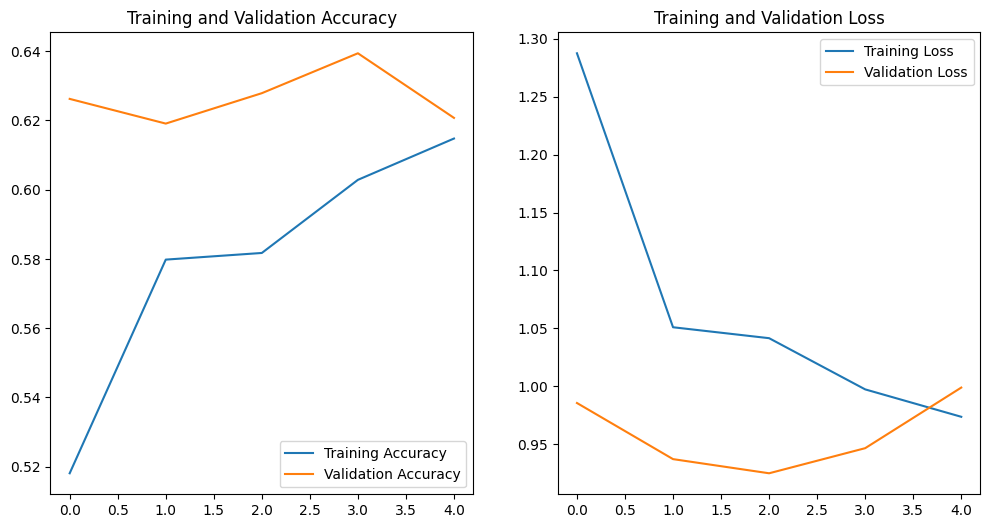

In [16]:
# Call the plotting function
plot_metrics(history)

### Testing Model

In [ ]:
# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Chetan/Downloads/testing/",  # Path to test data
    image_size=(500, 500),
    batch_size=32
)

# Normalize the test dataset
test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 5 files belonging to 5 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.6000 - loss: 0.7335
Test Loss: 0.7335145473480225
Test Accuracy: 0.6000000238418579


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load a single image
img_path = 'C:/Users/Chetan/Downloads/testing/H5/5.jpg'
img = image.load_img(img_path, target_size=(500, 500))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Get the class with the highest probability

print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Class: 3


In [34]:
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    print(f"True Labels: {labels.numpy()}")
    print(f"Predicted Labels: {predicted_classes}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
True Labels: [3 0 4 2 1]
Predicted Labels: [3 0 4 0 4]
